# Laptop Price Prediction

homework: https://github.com/DataTalksClub/machine-learning-zoomcamp/blob/master/cohorts/2024/02-regression/homework.md

In [ ]:
# data = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv'
# !wget $data 

--2024-10-09 03:17:43--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 298573 (292K) [text/plain]
Saving to: ‘laptops.csv’

laptops.csv         100%[===================>] 291.58K  --.-KB/s    in 0.004s  

2024-10-09 03:17:43 (69.8 MB/s) - ‘laptops.csv’ saved [298573/298573]



KeyboardInterrupt: 

In [67]:
import pandas as pd
import numpy as np
import seaborn as sns

In [68]:
df = pd.read_csv('laptops.csv')
df.columns = df.columns.str.lower().str.replace(' ', '_')


In [69]:
df

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01
...,...,...,...,...,...,...,...,...,...,...,...,...
2155,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3060,17.3,No,2699.99
2156,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3070,17.3,No,2899.99
2157,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,32,1000,SSD,RTX 3080,17.3,No,3399.99
2158,Razer Book 13 Intel Evo Core i7-1165G7/16GB/1T...,Refurbished,Razer,Book,Intel Evo Core i7,16,1000,SSD,NaN,13.4,Yes,1899.99


In [70]:
base = ['ram', 'storage', 'screen']
df[base]
print(df[base].head())


   ram  storage  screen
0    8      512    15.6
1    8      256    15.6
2    8      256    15.6
3   16     1000    15.6
4   16      512    15.6


### EDA
Look at the final_price variable. Does it have a long tail?

<Axes: xlabel='final_price', ylabel='Count'>

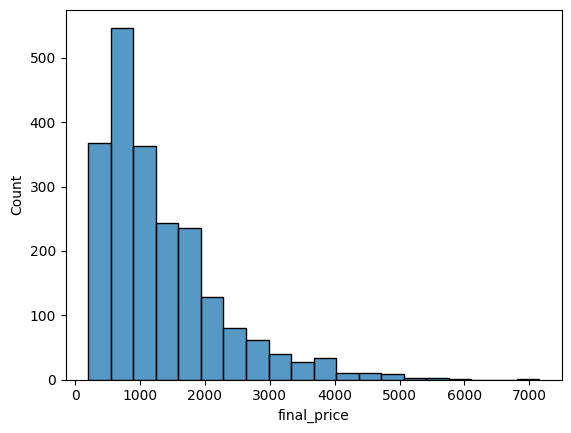

In [71]:
sns.histplot(df['final_price'], bins=20) 

<Axes: xlabel='final_price', ylabel='Count'>

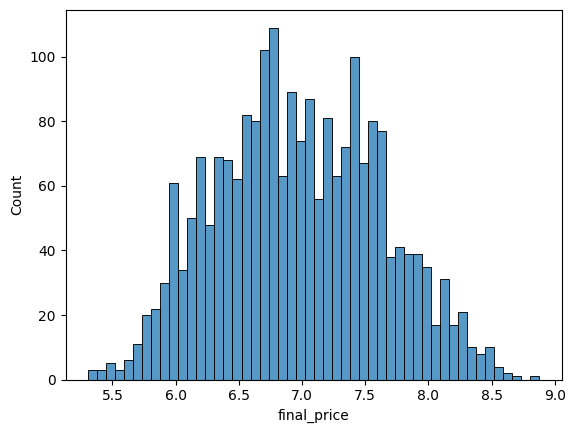

In [72]:
final_price_logs = np.log1p(df.final_price)
sns.histplot(final_price_logs, bins=50)

Question 1
There's one column with missing values. What is it?
Answer : Screen

In [73]:
df[base].isnull().sum() 

ram        0
storage    0
screen     4
dtype: int64

Question 2
What's the median (50% percentile) for variable 'ram'? 16

In [74]:
df['ram'].describe()

count    2160.000000
mean       15.413889
std         9.867815
min         4.000000
25%         8.000000
50%        16.000000
75%        16.000000
max       128.000000
Name: ram, dtype: float64

### Prepare and split 
* Shuffle the dataset (the filtered one you created above), use seed 42.
* Split your data in train/val/test sets, with 60%/20%/20% distribution.
* Use the same code as in the lectures

In [75]:
n = len(df)
n_val = int(n*0.2)
n_test = int(n*0.2)
n_train = n - n_val - n_test    

n_train, n_val, n_test

(1296, 432, 432)

In [76]:
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)   #to shuffle the index

In [77]:
df_train = df.iloc[idx[:n_train]].reset_index(drop=True)
df_val = df.iloc[idx[n_train:n_train+n_val]].reset_index(drop=True)
df_test = df.iloc[idx[n_train+n_val:]].reset_index(drop=True)

df_train.head(1)

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
0,MSI Modern 15 A11SBU-620XES Intel Core i7-1165...,Refurbished,MSI,Modern,Intel Core i7,32,1000,SSD,MX 450,15.6,No,1123.29


In [78]:
len(df_train), len(df_val), len(df_test)

(1296, 432, 432)

### Question 3: train with missing values treated both as filled with zero and filled with mean 

In [79]:
#Select values for y and delete them from the dataframes

y_train = np.log1p(df_train.final_price.values)
y_val = np.log1p(df_val.final_price.values)
y_test = np.log1p(df_test.final_price.values)

del df_train['final_price']
del df_val['final_price']
del df_test['final_price']

In [80]:
# Fill missing values with zeros

X_train = df_train[base].fillna(0).values
X_train

array([[  32. , 1000. ,   15.6],
       [   4. ,   64. ,   14.1],
       [  32. , 1000. ,   14. ],
       ...,
       [  16. ,  512. ,   15.6],
       [  16. ,  512. ,   14. ],
       [  16. ,  512. ,   14. ]])

In [81]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones,X])
    
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

def prepare_X_withzeros(df):
    df_num = df[base]
    df_num = df.fillna(0)
    X = df_num.values
    return X

def rmse(y, y_pred):
    error = y - y_pred
    se = error ** 2
    mse = se.mean()
    return round(np.sqrt(mse),2)

In [82]:
X_train = df_train[base].values
w0, w = train_linear_regression(X_train, y_train)
y_pred = w0 + X_train.dot(w)

<Axes: ylabel='Count'>

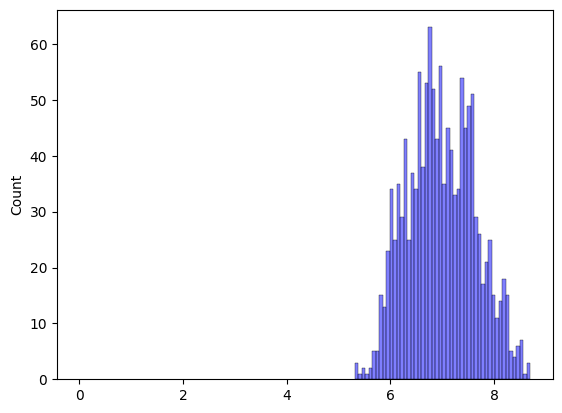

In [83]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

In [84]:
# RMSE for the training set with missing values filled with zeros
score = rmse(y_train, y_pred)
score

np.float64(nan)

Validate the model filled with zeros

In [90]:
X_train = df_train[base].fillna(0).values
X_train

array([[  32. , 1000. ,   15.6],
       [   4. ,   64. ,   14.1],
       [  32. , 1000. ,   14. ],
       ...,
       [  16. ,  512. ,   15.6],
       [  16. ,  512. ,   14. ],
       [  16. ,  512. ,   14. ]])

In [91]:
y_train

array([7.024907  , 5.30851519, 6.90649448, ..., 6.96602419, 7.42177579,
       6.96318999])

<Axes: ylabel='Count'>

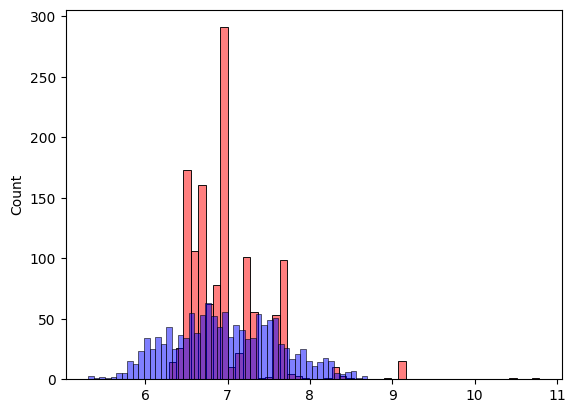

In [94]:
#Training part
#X_train = prepare_X_withzeros(df_train)  

w0, w = train_linear_regression(X_train, y_train)
y_pred = w0 + X_train.dot(w)
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)


In [ ]:
base = ['ram', 'storage', 'screen']

def prepare_X_withzeros(df):
    df_num = df[base]
    df_num = df.fillna(0)
    X = df_num.values
    return X

#Validation part
X_val = prepare_X_withzeros(df_val)  
y_pred = w0 + X_val.dot(w)

first_score = rmse(y_val, y_pred)
first_score

Prepare and validate model filled with mean

In [61]:
def prepare_X_with_mean(df):
    mean = df['storage'].mean()
    df_num = df.fillna(mean)
    X = df_num.values
    return X

#Training part
X_train = prepare_X_with_mean(df_train)
w0, w = train_linear_regression(X_train, y_train)

#Validation part
X_val = prepare_X_with_mean(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

np.float64(0.43)

Answer Q3: both are equally good, either filling with zeros or with the mean of df_train


### Question 4: train regularized linear regression

In [62]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones,X])
    
    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]



In [63]:
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    X_train = prepare_X_withzeros(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r)

    #Validation part
    X_val = prepare_X_withzeros(df_val)
    y_pred = w0 + X_val.dot(w)

    score = rmse(y_val, y_pred)
    print(r, w0, score)


0 6.7271637061124565 0.43
1e-06 6.727163089608549 0.43
0.0001 6.727102056264831 0.43
0.001 6.72654725869555 0.43
0.01 6.721004333260311 0.43
0.1 6.666075503828241 0.43
1 6.162616499461121 0.43
5 4.616086176497502 0.46
10 3.5167547207936254 0.51


If there are multiple options, select the smallest r. 
Best RMSE result is with r = 0

### Question 5

* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`.
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores. 
* What's the standard deviation of all the scores? To compute the standard deviation, use `np.std`.
* Round the result to 3 decimal digits (`round(std, 3)`)

What's the value of std?

- 0.5
- 0.05
- 0.005
- 0.0005

> Note: Standard deviation shows how different the values are.
> If it's low, then all values are approximately the same.
> If it's high, the values are different. 
> If standard deviation of scores is low, then our model is *stable*.

In [64]:
scores = [first_score]
for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]: 
    # Select seed, generate indexes and shuffle them
    idx = np.arange(n)
    np.random.seed(seed)
    np.random.shuffle(idx)   # to shuffle the index

    # Split the data into training, validation and test sets with 60%, 20% and 20% of the data 
    # respectively according to the shuffled indexes
    # Reset the index of the dataframes
    df_train = df_selected.iloc[idx[:n_train]].reset_index(drop=True)
    df_val = df_selected.iloc[idx[n_train:n_train+n_val]].reset_index(drop=True)
    df_test = df_selected.iloc[idx[n_train+n_val:]].reset_index(drop=True)

    # Training part
    X_train = prepare_X_withzeros(df_train)
    w0, w = train_linear_regression(X_train, y_train)

    # Validation part
    X_val = prepare_X_withzeros(df_val)
    y_pred = w0 + X_val.dot(w)

    score = rmse(y_val, y_pred)
    scores.append(score)
    print(seed, score)

# Calculate and print the standard deviation of the scores
std = np.std(scores)
print("Standard Deviation:", round(std, 3))


0 0.65
1 0.65
2 0.65
3 0.65
4 0.65
5 0.65
6 0.65
7 0.65
8 0.65
9 0.65
Standard Deviation: 0.063
